In [1]:
import sys, operator, os, string, re, random, math
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

In [2]:
f = open("VanDamDaylong.txt", "r", encoding='utf-8')

In [3]:
line_num = 0
speech_dict = {}
tokens = []
text = []

In [4]:
for line in f:
    line = re.sub("[\[].*?[\]]", "", line)
    line = line.replace(".","")
    line = line.replace("!","")
    line = line.replace("?","")
    line = line.replace("xxx","")
    line = line.replace("yyy","")
    line = line.replace("zzz","")
    line = line.replace("(g)","g")
    line = line.replace("<", "")
    line = line.replace(">", "")
    line = line.replace("-", " ")
    line = line.replace("(", "")
    line = line.replace(")", "")
    line = line.replace("+", "")
    line = line.replace("/", "")
    line = line.replace('"', "")
    line = line.replace(",", "")
    line = line.replace("VCM0", "VCM")
    line = line.replace("0 ", "")
    
    speech_line = line.strip().strip('\n').strip()
    token_list = speech_line.split()

    for word in token_list:
        if word[0]=="&" or word[0]=="VCM" or word[0]=="VCM0":
            token_list.remove(word)
    if token_list[0][0] != "@":
        text.append(token_list)

In [5]:
f.close()

In [6]:
print(text)

[['*CHI:', '\x150_12414\x15'], ['*CHI:', '\x1512414_17804\x15'], ['*CHI:', '\x1517804_30429\x15'], ['*CHI:', '\x1530429_33578\x15'], ['*CHI:', '\x1533578_37359\x15'], ['*CHI:', '\x1537508_59836\x15'], ['*MOT:', "let's", 'change', 'your', 'diaper', '\x1559836_66554\x15'], ['*CHI:', '\x1566554_71117\x15'], ['*MOT:', 'girl', '\x1571117_73039\x15'], ['*MOT:', 'girl', '\x1573039_76789\x15'], ['*MOT:', 'girl', '\x1576789_82211\x15'], ['*CHI:', '\x1582211_86339\x15'], ['*CHI:', 'a', 'mama', '\x1586339_90557\x15'], ['*MOT:', 'Natasha', '\x1590882_93117\x15'], ['*CHI:', '\x1593117_103086\x15'], ['*CHI:', '\x15103086_114242\x15'], ['*MOT:', 'girl', '\x15114242_118336\x15'], ['*CHI:', '\x15118336_119758\x15'], ['*CHI:', '\x15119758_126586\x15'], ['*MOT:', 'I', 'think', '\x15126586_136789\x15'], ['*CHI:', '\x15136789_141634\x15'], ['*CHI:', '\x15141539_149664\x15'], ['*CHI:', '\x15149664_152563\x15'], ['*MOT:', 'oh', 'girl', '\x15152563_154641\x15'], ['*CHI:', '\x15154758_172433\x15'], ['*CHI:', '

In [5]:
count = 0
for item in text:
    if item[0] == "*MOT:":
        count += len(item)-2
count

14611

In [7]:
time_list = []
for i in range(len(text)):
    if text[i][0][0] == "*":
        time = text[i][-1].split("_")
        print(time)
        start = int(time[0][1:])
        end = int(time[1][:-1])
        duration = end - start
        word_count = len(text[i][1:-1])
        time_list.append((text[i][0], word_count, start, end, duration))
print(time_list[0:11])

['\x150', '12414\x15']
['\x1512414', '17804\x15']
['\x1517804', '30429\x15']
['\x1530429', '33578\x15']
['\x1533578', '37359\x15']
['\x1537508', '59836\x15']
['\x1559836', '66554\x15']
['\x1566554', '71117\x15']
['\x1571117', '73039\x15']
['\x1573039', '76789\x15']
['\x1576789', '82211\x15']
['\x1582211', '86339\x15']
['\x1586339', '90557\x15']
['\x1590882', '93117\x15']
['\x1593117', '103086\x15']
['\x15103086', '114242\x15']
['\x15114242', '118336\x15']
['\x15118336', '119758\x15']
['\x15119758', '126586\x15']
['\x15126586', '136789\x15']
['\x15136789', '141634\x15']
['\x15141539', '149664\x15']
['\x15149664', '152563\x15']
['\x15152563', '154641\x15']
['\x15154758', '172433\x15']
['\x15172433', '174917\x15']
['\x15174917', '176995\x15']
['\x15177211', '181414\x15']
['\x15181414', '183780\x15']
['\x15183780', '185686\x15']
['\x15185836', '192804\x15']
['\x15192804', '197492\x15']
['\x15197492', '202086\x15']
['\x15202086', '204258\x15']
['\x15204258', '206867\x15']
['\x15206867', '21

ValueError: invalid literal for int() with base 10: 'CHI:'

In [8]:
participants = {"MOT" : 1, "SIS" : 2, "FAT" : 3, "CHI" : 4}
colormapping = {"MOT" : "lightcoral", "SIS" : "sandybrown", "FAT" : "yellowgreen", "CHI" : "skyblue"}

In [9]:
verts = []
colors = []
for t in time_list:
    v = [(t[2], participants[t[0][1:-1]]-.4),
        (t[2], participants[t[0][1:-1]]+.4),
        (t[3], participants[t[0][1:-1]]+.4),
        (t[3], participants[t[0][1:-1]]-.4),
        (t[2], participants[t[0][1:-1]]-.4),]
    verts.append(v)
    colors.append(colormapping[t[0][1:-1]])

bars = PolyCollection(verts, facecolors = colors)

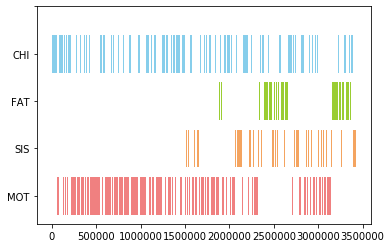

In [10]:
fig, ax = plt.subplots()
ax.add_collection(bars)
ax.autoscale()
ax.set_yticks([1,2,3,4,5])
ax.set_yticklabels(list(participants.keys()))
plt.savefig("vis_vandam.png")